In [ ]:
#import necessary packages
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
# xlrd is needed to load excel files
!pip install xlrd

In [ ]:
#Load data
from google.colab import files
uploaded = files.upload()
import io

Saving Folds5x2_pp.xlsx to Folds5x2_pp.xlsx


In [ ]:
df = pd.read_excel(io.BytesIO(uploaded['Folds5x2_pp.xlsx']))
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
missing_data = df.isnull()
missing_data.head()

,AT,V,AP,RH,PE
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [ ]:
missing_data.sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [ ]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
print(df.nunique())

AT    2773
V      634
AP    2517
RH    4546
PE    4836
dtype: int64


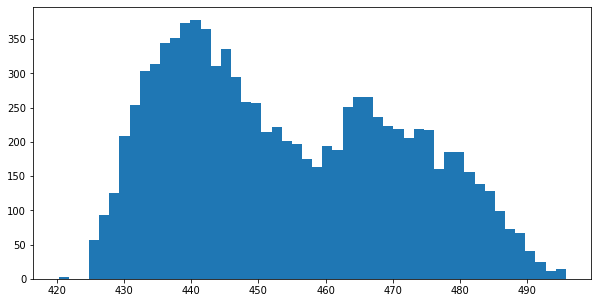

In [ ]:
A = df.columns[4]
data = df[A]
density = stats.gaussian_kde(data)
plt.figure(figsize = (10,5))
plt.hist(data, bins=50)
plt.show()

In [ ]:
#Data Scaling
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
df_new = df.copy()
scaler.fit(df_new[df_new.columns[0:]])
df_new[df_new.columns[0:]] = scaler.transform(df_new[df_new.columns[0:]])
df_new.head()

,AT,V,AP,RH,PE
0,0.372521,0.291815,0.771591,0.638204,0.569536
1,0.662040,0.669039,0.671863,0.449330,0.319338
2,0.093484,0.249822,0.476862,0.892493,0.904636
3,0.539660,0.568683,0.429349,0.684718,0.347285
4,0.255241,0.216014,0.404355,0.952547,0.710464


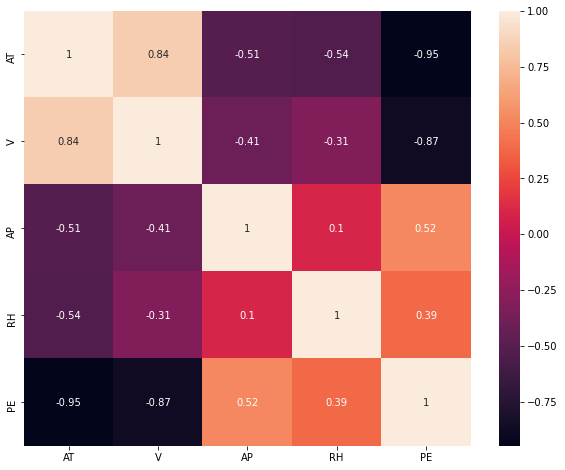

In [ ]:
#Explore the correlation between parameters
f, ax = plt.subplots(figsize=(10, 8))
corr = df_new.corr()
sns.heatmap(corr, annot=True)

(0.0, 499.7407234247667)

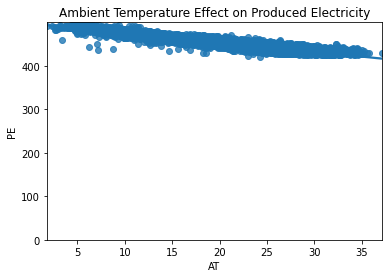

In [ ]:
sns.regplot(x="AT",y="PE", data=df)
plt.title('Ambient Temperature Effect on Produced Electricity')
plt.ylim(0,)

(0.0, 499.53499999999997)

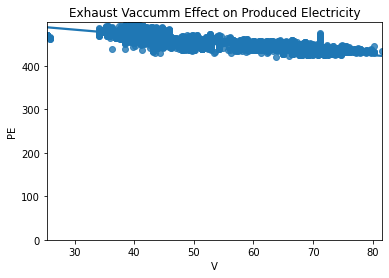

In [ ]:
sns.regplot(x="V",y="PE", data=df)
plt.title('Exhaust Vaccumm Effect on Produced Electricity')
plt.ylim(0,)

(0.0, 499.53499999999997)

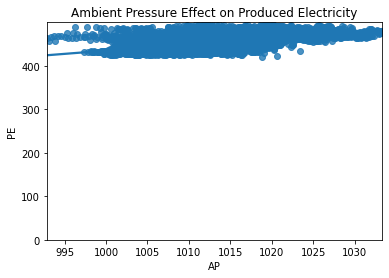

In [ ]:
sns.regplot(x="AP",y="PE", data=df)
plt.title('Ambient Pressure Effect on Produced Electricity')
plt.ylim(0,)

(0.0, 499.53499999999997)

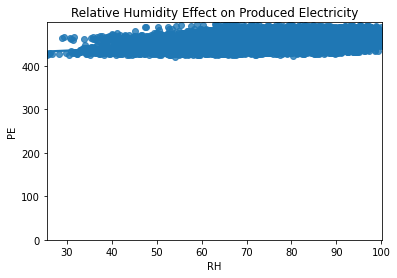

In [ ]:
sns.regplot(x="RH",y="PE", data=df)
plt.title('Relative Humidity Effect on Produced Electricity')
plt.ylim(0,)

In [ ]:
#Split Training Set to 80% and Testing Set to 20%
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(df_new.iloc[:,0:-1], df_new.iloc[:,-1:], test_size=0.2, random_state=42, stratify=df_new.iloc[])
X.reset_index(inplace=True)
y = y.reset_index()

X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

In [ ]:
X = X.drop('index', axis=1)
X.head()

,AT,V,AP,RH
0,0.569688,0.420996,0.405840,0.844504
1,0.262890,0.268149,0.806236,0.662332
2,0.189235,0.253559,0.696857,0.833512
3,0.272521,0.345552,0.508290,0.762601
4,0.438244,0.260320,0.351398,0.652681


In [ ]:
y = y.drop('index', axis=1)
y.head()

,PE
0,0.305298
1,0.936424
2,0.843444
3,0.673245
4,0.569801


In [ ]:
X_test = X_test.drop('index', axis=1)
X_test.head()

,AT,V,AP,RH
0,0.505099,0.403915,0.542440,0.662198
1,0.749292,0.780605,0.497897,0.221716
2,0.741360,0.743950,0.357090,0.666622
3,0.760057,0.780605,0.500371,0.155094
4,0.213314,0.226335,0.659985,0.565416


In [ ]:
y_test = y_test.drop('index', axis=1)
y_test.head()

,PE
0,0.463709
1,0.212583
2,0.270464
3,0.187285
4,0.818543


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X,y)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
rg = MLPRegressor(max_iter=10000)
param_list = {"hidden_layer_sizes": [(1,),(10,),(50,),(100,)], 
              "activation": ["identity", "logistic", "tanh", "relu"], 
              "solver": ["lbfgs", "sgd", "adam"], 
              "alpha": [0.00005,0.0005]
              }
gridCV1 = GridSearchCV(estimator=rg,param_grid=param_list,refit = True, verbose = 3)
gridCV1.fit(X,y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs, score=0.926, total=   0.0s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs, score=0.924, total=   0.0s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs, score=0.933, total=   0.1s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs, score=0.929, total=   0.1s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs, score=0.929, total=   0.0s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd, score=-0.070, total=   0.5s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd, score=0.545, total=   0.7s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd, score=0.771, total=   1.1s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd 
[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd, score=0.824, total=   0.1s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd, score=0.730, total=   0.5s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam, score=0.820, total=   1.4s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam, score=0.768, total=   0.8s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam, score=0.721, total=   1.0s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam, score=0.726, total=   0.7s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam, score=0.826, total=   0.4s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs 
[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs, score=0.926, total=   0.0s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs 
[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs, score=0.924, total=   0.0s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs 
[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs, score=0.933, total=   0.0s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs 
[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs, score=0.929, total=   0.0s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when 

[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs, score=0.929, total=   0.1s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd, score=0.889, total=   0.4s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd, score=0.861, total=   0.3s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd, score=0.869, total=   0.3s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd, score=0.776, total=   0.3s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd, score=0.872, total=   0.3s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam, score=0.921, total=   0.2s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam, score=0.867, total=   0.6s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam, score=0.919, total=   0.3s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam, score=0.901, total=   0.4s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam, score=0.917, total=   0.3s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs 
[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs, score=0.926, total=   0.1s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs, score=0.924, total=   0.1s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs 
[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs, score=0.933, total=   0.1s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs, score=0.929, total=   0.1s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs 
[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs, score=0.929, total=   0.1s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd, score=0.896, total=   0.4s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd, score=0.791, total=   0.4s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd, score=0.901, total=   0.4s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd, score=0.845, total=   0.4s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd, score=0.883, total=   0.4s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam, score=0.924, total=   0.4s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam, score=0.924, total=   0.4s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam, score=0.933, total=   0.3s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam, score=0.925, total=   0.6s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam, score=0.904, total=   0.3s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs, score=0.926, total=   0.2s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs, score=0.924, total=   0.2s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs, score=0.933, total=   0.2s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs 
[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs, score=0.929, total=   0.1s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs, score=0.929, total=   0.2s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd, score=0.844, total=   0.6s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd, score=0.861, total=   0.5s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd, score=0.813, total=   0.6s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd, score=0.859, total=   0.5s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd, score=0.803, total=   0.5s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam, score=0.923, total=   0.4s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam, score=0.924, total=   0.5s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam, score=0.931, total=   0.3s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam, score=0.928, total=   0.4s
[CV] activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam, score=0.928, total=   0.4s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs, score=0.926, total=   0.0s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs, score=0.924, total=   0.1s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs, score=0.933, total=   0.0s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs, score=0.929, total=   0.0s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when 

[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs, score=0.929, total=   0.1s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd 
[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd, score=0.694, total=   0.2s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd, score=0.466, total=   0.7s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd, score=0.577, total=   0.4s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd, score=0.801, total=   0.3s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd, score=0.819, total=   0.7s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam, score=0.747, total=   0.8s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam, score=0.766, total=   1.1s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam, score=0.797, total=   1.3s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam, score=0.868, total=   0.4s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam, score=0.811, total=   0.7s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs 
[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs, score=0.926, total=   0.0s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs 
[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs, score=0.924, total=   0.0s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs 
[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs, score=0.933, total=   0.1s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when 

[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs, score=0.929, total=   0.1s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs 
[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs, score=0.929, total=   0.0s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd, score=0.839, total=   0.4s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd, score=0.672, total=   0.3s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd, score=0.803, total=   0.3s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd, score=0.806, total=   0.4s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd, score=0.757, total=   0.4s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam, score=0.814, total=   0.4s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam, score=0.920, total=   0.4s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam, score=0.930, total=   0.2s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam, score=0.924, total=   0.5s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam, score=0.913, total=   0.2s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs 
[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs, score=0.926, total=   0.1s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs 
[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs, score=0.924, total=   0.1s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs, score=0.933, total=   0.1s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs 
[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs, score=0.929, total=   0.2s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs, score=0.929, total=   0.1s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd, score=0.836, total=   0.5s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd, score=0.775, total=   0.6s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd, score=0.802, total=   0.5s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd, score=0.711, total=   0.5s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd, score=0.769, total=   0.4s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam, score=0.926, total=   0.4s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam, score=0.910, total=   0.7s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam, score=0.923, total=   0.5s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam, score=0.929, total=   0.4s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam, score=0.928, total=   0.5s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs 
[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs, score=0.926, total=   0.2s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs, score=0.924, total=   0.2s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs 
[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs, score=0.933, total=   0.2s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs, score=0.929, total=   0.3s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs 
[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs, score=0.929, total=   0.1s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd, score=0.847, total=   0.5s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd, score=0.877, total=   0.5s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd, score=0.874, total=   0.5s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd, score=0.843, total=   0.6s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd, score=0.833, total=   0.6s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam, score=0.925, total=   0.4s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam, score=0.924, total=   0.4s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam, score=0.933, total=   0.4s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam, score=0.929, total=   0.4s
[CV] activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam, score=0.924, total=   0.4s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs, score=0.933, total=   0.0s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs, score=0.932, total=   0.0s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs, score=0.940, total=   0.1s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs, score=0.936, total=   0.0s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when 

[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs, score=0.934, total=   0.1s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd 
[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd, score=0.000, total=   0.2s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd, score=-0.002, total=   0.1s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd 
[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd, score=0.066, total=   0.1s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd, score=-0.001, total=   0.1s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd 
[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd, score=-0.004, total=   0.1s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam, score=0.280, total=   0.3s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam 
[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam, score=0.009, total=   0.1s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam, score=0.898, total=   0.4s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam, score=0.879, total=   0.5s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam, score=-0.049, total=   0.4s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs 
[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs, score=0.930, total=   0.1s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs, score=0.930, total=   0.1s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs 
[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs, score=0.938, total=   0.2s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs, score=0.935, total=   0.2s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs, score=0.932, total=   0.2s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd 
[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd, score=-0.007, total=   0.2s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd, score=0.084, total=   0.3s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd, score=0.240, total=   0.7s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd 
[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd, score=0.020, total=   0.2s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd, score=0.312, total=   0.7s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam, score=0.897, total=   0.6s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam, score=0.873, total=   0.7s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam, score=0.890, total=   0.7s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam, score=0.886, total=   0.6s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam, score=0.883, total=   0.6s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs, score=0.927, total=   0.5s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs, score=0.925, total=   0.8s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs, score=0.933, total=   0.3s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs, score=0.930, total=   0.8s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs, score=0.930, total=   1.1s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd, score=0.455, total=   4.7s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd, score=0.488, total=   5.0s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd, score=0.288, total=   2.6s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd, score=0.038, total=   0.4s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd, score=0.192, total=   1.8s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam, score=0.894, total=   1.4s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam, score=0.895, total=   0.8s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam, score=0.899, total=   0.9s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam, score=0.898, total=   1.0s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam, score=0.906, total=   0.7s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs, score=0.926, total=   2.3s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs, score=0.925, total=   1.3s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs, score=0.934, total=   1.3s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs, score=0.930, total=   1.2s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs, score=0.929, total=   1.4s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd, score=0.355, total=   3.6s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd, score=0.167, total=   1.7s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd, score=0.452, total=   5.0s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd, score=0.528, total=   6.5s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd, score=0.314, total=   3.6s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam, score=0.906, total=   1.3s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam, score=0.898, total=   1.2s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam, score=0.910, total=   1.0s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam, score=0.908, total=   1.0s
[CV] activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam, score=0.896, total=   1.6s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs, score=0.933, total=   0.0s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs, score=0.931, total=   0.0s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs, score=0.940, total=   0.0s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs, score=0.936, total=   0.0s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solv

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when 

[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd, score=-0.046, total=   0.2s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd 
[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd, score=-0.050, total=   0.1s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd, score=-0.164, total=   0.1s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd 
[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd, score=-0.069, total=   0.1s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd, score=0.015, total=   0.2s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam, score=0.082, total=   0.4s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam, score=0.871, total=   0.7s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam, score=0.883, total=   0.4s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam, score=0.878, total=   0.5s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam, score=0.903, total=   0.4s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs 
[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs, score=0.933, total=   0.2s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs, score=0.929, total=   0.1s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs 
[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs, score=0.940, total=   0.2s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs, score=0.935, total=   0.2s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs 
[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs, score=0.933, total=   0.1s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd, score=0.357, total=   0.7s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd 
[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd, score=0.093, total=   0.2s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd, score=0.083, total=   0.2s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd 
[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd, score=0.111, total=   0.2s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd, score=0.069, total=   0.2s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam, score=0.902, total=   0.5s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam, score=0.881, total=   0.7s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam, score=0.898, total=   0.4s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam, score=0.897, total=   0.5s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam, score=0.881, total=   0.6s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs, score=0.927, total=   0.5s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs, score=0.926, total=   0.8s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs, score=0.934, total=   0.5s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs, score=0.931, total=   0.6s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs, score=0.933, total=   0.5s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd, score=0.093, total=   0.4s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd, score=0.265, total=   1.9s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd, score=0.417, total=   2.3s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd, score=0.072, total=   0.4s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd, score=0.185, total=   0.4s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam, score=0.895, total=   1.1s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam, score=0.906, total=   0.7s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam, score=0.903, total=   0.9s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam, score=0.903, total=   0.8s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam, score=0.907, total=   0.7s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs, score=0.927, total=   2.0s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs, score=0.925, total=   1.1s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs, score=0.934, total=   1.7s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs, score=0.930, total=   1.2s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs, score=0.930, total=   1.5s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd, score=0.396, total=   4.6s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd, score=0.426, total=   4.3s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd, score=0.432, total=   4.2s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd, score=0.468, total=   5.1s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd, score=0.400, total=   4.1s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam, score=0.905, total=   1.2s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam, score=0.891, total=   1.5s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam, score=0.899, total=   1.6s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam, score=0.906, total=   1.2s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam, score=0.905, total=   1.2s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs, score=0.933, total=   0.1s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs, score=0.931, total=   0.0s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs, score=0.940, total=   0.0s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs, score=0.936, total=   0.0s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when 

[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs, score=0.934, total=   0.1s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd, score=0.607, total=   0.3s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd, score=0.845, total=   0.7s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd 
[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd, score=-0.001, total=   0.1s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd, score=0.813, total=   0.6s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd 
[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd, score=0.888, total=   0.1s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam, score=-0.111, total=   0.4s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam, score=0.895, total=   0.6s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam, score=0.654, total=   0.2s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam 
[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam, score=0.862, total=   0.5s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam, score=0.916, total=   0.8s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs 
[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs, score=0.932, total=   0.1s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs, score=0.934, total=   0.2s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs 
[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs, score=0.939, total=   0.2s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs, score=0.939, total=   0.2s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs, score=0.935, total=   0.3s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd, score=0.889, total=   0.4s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd, score=0.877, total=   0.4s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd, score=0.782, total=   0.5s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd, score=0.802, total=   0.5s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd, score=0.801, total=   0.6s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam, score=0.924, total=   0.3s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam, score=0.917, total=   0.3s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam, score=0.937, total=   0.3s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam, score=0.879, total=   0.2s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam, score=0.863, total=   0.6s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs, score=0.934, total=   0.8s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs, score=0.925, total=   0.5s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs, score=0.933, total=   0.4s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs, score=0.929, total=   0.4s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs, score=0.934, total=   0.8s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd, score=0.869, total=   0.9s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd, score=0.833, total=   0.8s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd, score=0.784, total=   0.9s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd, score=0.830, total=   0.9s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd, score=0.872, total=   0.9s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam, score=0.927, total=   0.7s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam, score=0.921, total=   0.6s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam, score=0.920, total=   0.9s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam, score=0.931, total=   0.7s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam, score=0.926, total=   0.5s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs, score=0.926, total=   0.9s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs, score=0.925, total=   0.6s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs, score=0.933, total=   0.6s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs, score=0.930, total=   0.6s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs, score=0.929, total=   0.7s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd, score=0.840, total=   1.5s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd, score=0.838, total=   1.5s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd, score=0.794, total=   1.9s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd, score=0.852, total=   1.6s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd, score=0.873, total=   1.2s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam, score=0.922, total=   1.1s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam, score=0.921, total=   1.0s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam, score=0.931, total=   0.8s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam, score=0.930, total=   1.2s
[CV] activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam, score=0.926, total=   1.2s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs, score=0.933, total=   0.0s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs, score=0.932, total=   0.1s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs, score=0.940, total=   0.1s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when 

[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs, score=0.936, total=   0.1s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs, score=0.934, total=   0.1s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd 
[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd, score=-0.009, total=   0.1s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd, score=-0.183, total=   0.4s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd 
[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd, score=-0.184, total=   0.1s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd, score=0.798, total=   0.1s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd, score=0.738, total=   0.4s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam, score=0.897, total=   0.3s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam, score=0.865, total=   0.4s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam, score=-0.184, total=   1.0s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam, score=0.887, total=   0.4s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam, score=0.874, total=   0.7s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs 
[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs, score=0.932, total=   0.2s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs, score=0.931, total=   0.2s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs 
[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs, score=0.941, total=   0.2s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs, score=0.937, total=   0.2s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs, score=0.935, total=   0.3s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd, score=0.854, total=   0.4s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd, score=0.859, total=   0.3s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd, score=0.784, total=   0.4s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd, score=0.689, total=   0.4s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd, score=0.800, total=   0.6s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam, score=0.912, total=   0.4s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam, score=0.920, total=   0.4s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam, score=0.911, total=   0.4s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam, score=0.826, total=   0.5s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam, score=0.890, total=   0.4s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs, score=0.928, total=   0.3s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs, score=0.923, total=   0.5s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs, score=0.934, total=   0.3s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs, score=0.938, total=   0.7s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs, score=0.934, total=   0.7s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd, score=0.891, total=   0.9s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd, score=0.819, total=   1.0s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd, score=0.834, total=   0.3s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd, score=0.855, total=   1.0s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd, score=0.814, total=   0.7s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam, score=0.927, total=   0.6s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam, score=0.889, total=   0.7s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam, score=0.934, total=   0.6s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam, score=0.931, total=   0.5s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam, score=0.920, total=   0.8s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs, score=0.926, total=   0.8s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs, score=0.924, total=   0.6s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs, score=0.934, total=   0.8s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs, score=0.929, total=   1.0s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs, score=0.929, total=   0.7s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd, score=0.861, total=   1.3s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd, score=0.826, total=   1.3s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd, score=0.836, total=   1.3s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd, score=0.877, total=   1.7s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd, score=0.862, total=   1.5s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam, score=0.926, total=   1.1s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam, score=0.924, total=   0.9s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam, score=0.933, total=   0.8s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam, score=0.926, total=   1.1s
[CV] activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam, score=0.922, total=   1.2s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs, score=-0.001, total=   0.0s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs, score=-0.002, total=   0.0s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs, score=0.933, total=   0.0s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs, score=0.935, total=   0.1s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=lbfgs, score=0.929, total=   0.0s
[CV] activatio

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when 

[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd, score=0.735, total=   0.5s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd, score=0.547, total=   0.6s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd 
[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd, score=0.002, total=   0.2s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd, score=0.728, total=   0.4s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=sgd, score=0.786, total=   0.5s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam, score=0.794, total=   0.7s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam 
[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam, score=-0.002, total=   0.2s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam, score=-0.005, total=   1.0s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam, score=-0.000, total=   0.5s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(1,), solver=adam, score=-0.002, total=   0.6s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs 
[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs, score=0.933, total=   0.2s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs, score=0.924, total=   0.1s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs, score=0.940, total=   0.3s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs 
[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs, score=0.940, total=   0.2s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=lbfgs, score=0.934, total=   0.1s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd, score=0.887, total=   0.4s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd, score=0.836, total=   0.3s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd, score=0.875, total=   0.4s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd, score=0.780, total=   0.5s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=sgd, score=0.850, total=   0.4s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam, score=0.910, total=   0.4s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam, score=0.909, total=   0.6s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam, score=0.899, total=   0.4s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam, score=0.792, total=   0.8s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(10,), solver=adam, score=0.935, total=   0.3s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs, score=0.938, total=   1.3s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs, score=0.934, total=   0.4s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs, score=0.941, total=   0.5s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs, score=0.940, total=   0.6s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=lbfgs, score=0.936, total=   1.0s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd, score=0.839, total=   0.9s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd, score=0.810, total=   1.1s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd, score=0.833, total=   0.8s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd, score=0.814, total=   0.8s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=sgd, score=0.865, total=   0.6s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam, score=0.933, total=   0.5s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam, score=0.932, total=   0.5s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam, score=0.939, total=   0.4s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam, score=0.938, total=   0.5s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(50,), solver=adam, score=0.934, total=   0.7s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs, score=0.938, total=   1.9s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs, score=0.935, total=   0.9s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs, score=0.943, total=   1.2s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs, score=0.940, total=   1.1s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=lbfgs, score=0.937, total=   1.3s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd, score=0.856, total=   1.0s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd, score=0.862, total=   0.9s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd, score=0.828, total=   1.3s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd, score=0.887, total=   0.9s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=sgd, score=0.848, total=   1.1s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam, score=0.936, total=   0.7s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam, score=0.934, total=   0.6s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam, score=0.940, total=   0.7s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam, score=0.938, total=   0.8s
[CV] activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=5e-05, hidden_layer_sizes=(100,), solver=adam, score=0.933, total=   0.6s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs, score=0.926, total=   0.0s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs, score=-0.002, total=   0.0s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs, score=0.939, total=   0.0s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs, score=-0.000, total=   0.0s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs 
[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=lbfgs, score=0.934, total=   0.0s
[CV] 

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when 

[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd, score=-0.003, total=   0.2s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd, score=0.825, total=   0.5s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd 
[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd, score=0.536, total=   0.1s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd, score=0.523, total=   0.7s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd 
[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=sgd, score=0.048, total=   0.2s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam, score=0.842, total=   0.8s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam, score=0.899, total=   0.8s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam, score=0.831, total=   1.2s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam, score=-0.004, total=   0.3s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(1,), solver=adam, score=-0.000, total=   0.2s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs, score=0.936, total=   0.3s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs, score=0.934, total=   0.2s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs 
[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs, score=0.933, total=   0.1s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs, score=0.937, total=   0.2s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs 
[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=lbfgs, score=0.934, total=   0.1s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd, score=0.856, total=   0.5s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd, score=0.771, total=   0.3s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd, score=0.837, total=   0.3s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd, score=0.827, total=   0.5s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=sgd, score=0.828, total=   0.4s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam, score=0.925, total=   0.3s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam, score=0.806, total=   0.4s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam, score=0.916, total=   0.3s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam, score=0.921, total=   0.4s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(10,), solver=adam, score=0.847, total=   0.4s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs, score=0.935, total=   0.4s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs, score=0.935, total=   0.7s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs, score=0.942, total=   0.5s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs, score=0.940, total=   0.3s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=lbfgs, score=0.935, total=   0.3s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd, score=0.786, total=   0.8s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd, score=0.866, total=   0.8s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd, score=0.837, total=   1.1s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd, score=0.843, total=   0.7s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=sgd, score=0.857, total=   0.8s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam, score=0.932, total=   0.6s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam, score=0.933, total=   0.6s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam, score=0.942, total=   0.5s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam, score=0.934, total=   0.8s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(50,), solver=adam, score=0.914, total=   0.5s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs, score=0.935, total=   0.6s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs, score=0.936, total=   1.3s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs, score=0.941, total=   0.7s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs, score=0.939, total=   0.7s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=lbfgs, score=0.938, total=   1.6s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd, score=0.838, total=   1.6s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd, score=0.816, total=   1.3s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd, score=0.869, total=   1.0s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd, score=0.817, total=   1.3s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=sgd, score=0.832, total=   1.0s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam, score=0.936, total=   0.7s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam, score=0.927, total=   1.1s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam, score=0.942, total=   0.7s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam, score=0.939, total=   0.7s
[CV] activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0005, hidden_layer_sizes=(100,), solver=adam, score=0.936, total=   0.6s


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  5.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=10000, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_s...
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['identity', '

In [ ]:
print('Best parameters found:\n', gridCV1.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 5e-05, 'hidden_layer_sizes': (100,), 'solver': 'lbfgs'}


In [ ]:
rg = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='lbfgs',alpha=0.00005, max_iter=10000)
model2 = rg.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 100, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = GridSearchCV(estimator = rf, param_grid= random_grid, refit = True, verbose=2)
# Fit the random search model
rf_random.fit(X,y)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=  21.8s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.8s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=  21.4s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=  21.4s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=  21.3s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=  21.3s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1250 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1250, total=  26.8s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1250 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1250, total=  26.8s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1250 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1250, total=  26.7s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1250 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1250, total=  26.7s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1250 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1250, total=  26.7s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1500 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1500, total=  32.0s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1500 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1500, total=  32.0s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1500 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1500, total=  32.0s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1500 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1500, total=  32.0s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1500 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1500, total=  31.8s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1750 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1750, total=  37.4s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1750 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1750, total=  37.5s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1750 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1750, total=  37.3s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1750 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1750, total=  37.4s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1750 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1750, total=  37.1s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=  42.6s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=  42.6s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=  42.6s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=  42.6s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, total=  42.6s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=  19.0s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=  19.1s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=  19.1s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=  19.1s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=  18.9s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1250 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1250, total=  23.8s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1250 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1250, total=  23.8s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1250 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1250, total=  23.9s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1250 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1250, total=  23.8s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1250 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1250, total=  23.6s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1500 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1500, total=  28.5s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1500 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1500, total=  28.7s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1500 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1500, total=  28.7s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1500 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1500, total=  28.5s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1500 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1500, total=  28.7s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1750 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1750, total=  33.3s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1750 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1750, total=  33.4s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1750 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1750, total=  33.4s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1750 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1750, total=  33.3s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1750 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1750, total=  33.1s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=  38.0s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=  38.2s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=  38.2s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=  38.1s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=  37.8s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=  17.4s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=  17.4s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=  17.4s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=  17.4s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=  17.3s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1250 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1250, total=  21.8s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1250 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [ ]:
print('Best parameters found:\n', rf_random.best_params_)

AttributeError: ignored

In [ ]:
rf = RandomForestRegressor()
model3 = rf.fit(X,y)

In [ ]:
from sklearn import metrics
r2_score = model.score(X,y)
r2_score2 = model2.score(X,y)
r2_score3 = model3.score(X,y)

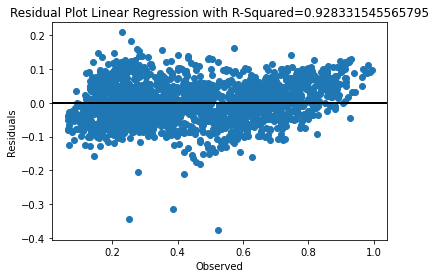

In [ ]:
y_pred = lr.predict(X_test)
residuals = y_test-y_pred

fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot Linear Regression with R-Squared={}".format(np.average(r2_score)))
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test,y_pred)
print("Mean Squared Error for Linear Regression is",mse1)
print('PE =',lr.coef_[0],'* [AT V AP RH] +',lr.intercept_)

Mean Squared Error for Linear Regression is 0.003556634533518255
PE = [-0.92850674 -0.1727637   0.03329137 -0.15623294] * [AT V AP RH] + [1.0933102]


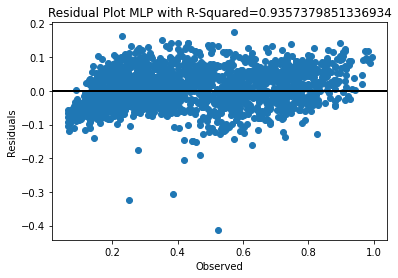

In [ ]:
y_pred2 = rg.predict(X_test)
residuals2 = y_test-y_pred2.reshape(-1,1)

fig, ax = plt.subplots()
ax.scatter(y_test, residuals2)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot MLP with R-Squared={}".format(np.average(r2_score2)))
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_test,y_pred2)
print("Mean Squared Error for MLP is",mse2)

Mean Squared Error for MLP is 0.0031699407437391462


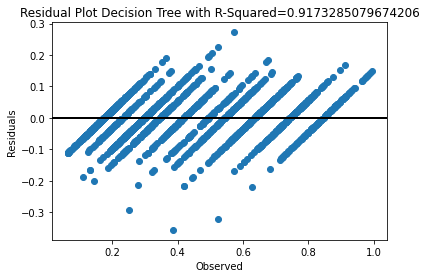

In [ ]:
y_pred3 = rg2.predict(X_test)
residuals3 = y_test-y_pred3.reshape(-1,1)

fig, ax = plt.subplots()
ax.scatter(y_test, residuals3)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot Decision Tree with R-Squared={}".format(np.average(r2_score3)))
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(y_test,y_pred3)
print("Mean Squared Error for Decision Tree is",mse3)

Mean Squared Error for Decision Tree is 0.004338041672884772
